VOL_ROI_DS_1_REG_0.001


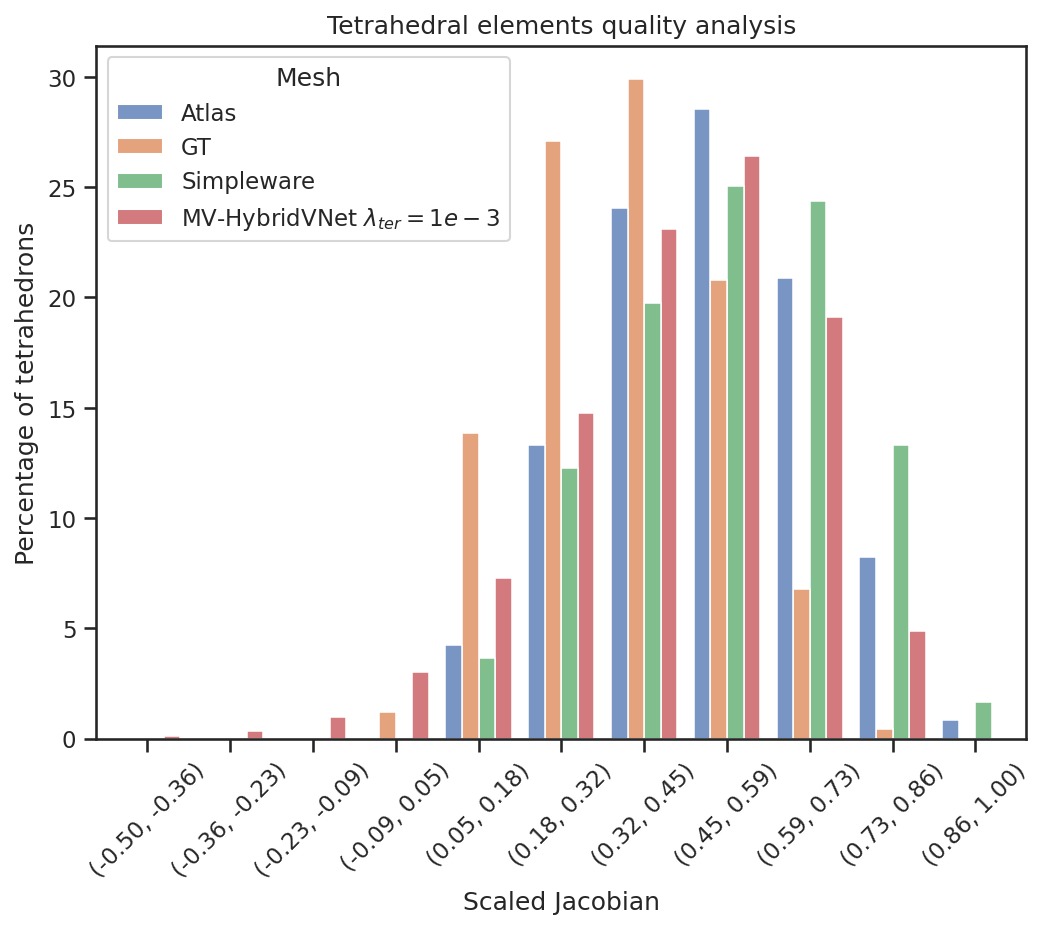

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 

sns.set()

sns.set_style("ticks")

atlas = np.load("../VolumetricQuality/atlas_jac.npy")
mean_ben = np.load("../VolumetricQuality/Ben_meshes.npy")
gt = np.load("../VolumetricQuality/GT_jac_mean_tetra.npy")

df_atlas = pd.DataFrame(atlas, columns = ["Quality"])
df_atlas['Mesh'] = "Atlas"

df_GT = pd.DataFrame(gt, columns = ["Quality"])
df_GT['Mesh'] = "GT"

df_simpleware = pd.DataFrame(mean_ben, columns = ["Quality"])
df_simpleware['Mesh'] = "Simpleware"

models = os.listdir("../Predictions/Volumetric")

dfs_list = [df_atlas, df_GT, df_simpleware]

for model in models:
    path = "../Predictions/Volumetric/" + model + "/mean_scaled_jacobian_tetra.npy"
    
    if not os.path.exists(path):
        continue
        
    model_name = "MV-HybridVNet $\lambda_{ter} = " + model.split("_")[-1] + "$"
    
    if not "0.001" in model_name:
        continue
    model_name = model_name.replace("0.001", "1e-3")
    
    mean = np.load(path)
    df = pd.DataFrame(mean, columns = ["Quality"])
    df['Mesh'] = model_name
    
    print(model)
    
    dfs_list.append(df)

dfs = pd.concat(dfs_list)
dfs.reset_index(drop=True, inplace=True)

plt.figure(figsize = (8, 6), dpi = 150)

bins = np.linspace(-0.5, 1, 12)
tickpos = []
ticks = []
for j in range(1, len(bins)):
    tickpos.append((bins[j] + bins[j-1])/2)
    ticks.append("(%.2f, %.2f)" %(bins[j-1],bins[j]))

ax = sns.histplot(x="Quality", hue="Mesh", bins = bins, multiple="dodge", data=dfs, shrink = 0.8, stat='percent', common_norm=False)
#ax = sns.histplot(x="Quality", hue="Mesh", bins = bins, multiple="dodge", data=dfs, shrink = 0.8)
ax.set_xticks(tickpos, ticks, rotation = 45)

plt.title("Tetrahedral elements quality analysis")
plt.ylabel("Percentage of tetrahedrons")
plt.xlabel("Scaled Jacobian")
plt.margins(x=0.02)

plt.savefig('ToPlot/histogram.pdf', bbox_inches='tight', dpi=200)


In [27]:
# Create a table from the dfs dataframe
# The table contains mean and std, min, max, 1%, 5%, 25%, 50%, 75% of the quality measures

df_table = pd.DataFrame(columns=['Mesh', 'mean', 'std', 'min', 'max', '1%', '5%', '25%', '50%', '75%'])

for df in dfs_list:
    mesh = df['Mesh'].values[0]
    
    df = df["Quality"]
    
    mean = df.mean()
    std = df.std()
    min = df.min()
    max = df.max()
    p1 = df.quantile(0.01)
    p5 = df.quantile(0.05)
    p25 = df.quantile(0.25)
    p50 = df.quantile(0.50)
    p75 = df.quantile(0.75)
    
    # round values to 3 decimals
    mean, std, min, max, p1, p5, p25, p50, p75 = round(mean, 3), round(std, 3), round(min, 3), round(max, 3), round(p1, 3), round(p5, 3), round(p25, 3), round(p50, 3), round(p75, 3)
    
    
    df_table = df_table.append({'Mesh': mesh, 'mean': mean, 'std': std, 'min': min, 'max': max, '1%': p1, '5%': p5, '25%': p25, '50%': p50, '75%': p75}, ignore_index=True)
        
df_table.reset_index(drop=True, inplace=True)
df_table

/tmp/ipykernel_1328728/3526467942.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_table = df_table.append({'Mesh': mesh, 'mean': mean, 'std': std, 'min': min, 'max': max, '1%': p1, '5%': p5, '25%': p25, '50%': p50, '75%': p75}, ignore_index=True)
/tmp/ipykernel_1328728/3526467942.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_table = df_table.append({'Mesh': mesh, 'mean': mean, 'std': std, 'min': min, 'max': max, '1%': p1, '5%': p5, '25%': p25, '50%': p50, '75%': p75}, ignore_index=True)
/tmp/ipykernel_1328728/3526467942.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_table = df_table.append({'Mesh': mesh, 'mean': mean, 'std': std, 'min': min, 'max': max, '1%': p1, '5%': p5, '25%': p25, '50%': p50, 

,Mesh,mean,std,min,max,1%,5%,25%,50%,75%
0,Atlas,0.491,0.174,0.092,0.984,0.115,0.194,0.367,0.494,0.617
1,GT,0.355,0.156,-0.207,0.838,0.04,0.103,0.238,0.353,0.47
2,Simpleware,0.524,0.185,0.064,0.992,0.128,0.202,0.387,0.535,0.667
3,MV-HybridGNet3D $\lambda_{ter} = 0.01$,0.501,0.309,-0.931,0.943,-0.681,-0.298,0.434,0.577,0.688
4,MV-HybridGNet3D $\lambda_{ter} = 0$,0.222,0.225,-0.759,0.876,-0.327,-0.144,0.065,0.219,0.384
5,MV-HybridGNet3D $\lambda_{ter} = 0.0001$,0.229,0.23,-0.771,0.871,-0.337,-0.151,0.068,0.231,0.397
6,MV-HybridGNet3D $\lambda_{ter} = 0.001$,0.433,0.206,-0.719,0.904,-0.138,0.059,0.307,0.457,0.585


In [15]:
import pandas as pd
import numpy as np
import os
from tabulate import tabulate

# Set up metrics properties
metrics = ['scaled_jacobian', 'aspect_ratio', 'shape', 'skew', 'distortion']
pretty_names = {
    'scaled_jacobian': 'Scaled Jacobian ↑',
    'aspect_ratio': 'Aspect Ratio ↓',
    'shape': 'Shape Quality ↑',
    'skew': 'Skewness ↓',
    'distortion': 'Distortion ↓'
}

# Load and process data
input_path = "../Predictions/Volumetric"
models = os.listdir(input_path)

# Create a list to store results
results = []

for model in models:
    # Extract regularization value from model name
    reg_value = model.split("_")[-1]
    reg_value = reg_value.replace("0.001", "1e-3").replace("0.01", "1e-2").replace("0.0001", "1e-4")
    
    # Store metrics for this model
    model_metrics = {'λter': reg_value}
    
    for metric in metrics:
        path = os.path.join(input_path, model, f"mean_{metric}_tetra.npy")
        if os.path.exists(path):
            values = np.load(path)
            model_metrics[pretty_names[metric]] = f"{values.mean():.3f} ± {values.std():.3f}"
    
    results.append(model_metrics)

# Create DataFrame and sort by regularization value
df = pd.DataFrame(results)
reg_order = {'0': 0, '1e-4': 1, '1e-3': 2, '1e-2': 3}
df['sort_key'] = df['λter'].map(reg_order)
df = df.sort_values('sort_key').drop('sort_key', axis=1)

In [16]:
# Print formatted table
print("\nFormatted Table (Text):")
print(tabulate(df, headers='keys', tablefmt='pipe', showindex=False))


Formatted Table (Text):
|   λter | Scaled Jacobian ↑   | Aspect Ratio ↓     | Shape Quality ↑   | Skewness ↓     | Distortion ↓   |
|-------:|:--------------------|:-------------------|:------------------|:---------------|:---------------|
| 0      | 0.222 ± 0.225       | 52.463 ± 16302.305 | 0.432 ± 0.256     | -1.000 ± 0.000 | 1.000 ± 0.000  |
| 0.0001 | 0.229 ± 0.230       | 24.492 ± 2212.500  | 0.440 ± 0.257     | -1.000 ± 0.000 | 1.000 ± 0.000  |
| 0.001  | 0.433 ± 0.206       | 8.163 ± 861.522    | 0.667 ± 0.208     | -1.000 ± 0.000 | 1.000 ± 0.000  |
| 0.01   | 0.501 ± 0.309       | 4.565 ± 702.272    | 0.738 ± 0.243     | -1.000 ± 0.000 | 1.000 ± 0.000  |
